In [1]:
import numpy as np
import pandas as pd
#!pip install pandas_datareader
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pandas_datareader import data
df = data.DataReader(['BTC-USD', 'ETH-USD', 'UNI1-USD', 'LINK-USD', 'USDC-USD'], 'yahoo', start='2020/09/14', end='2022/06/28')
df.head()

TypeError: string indices must be integers

In [5]:
# Closing price
df = df['Adj Close']
df.head()

Symbols,BTC-USD,ETH-USD,UNI1-USD,LINK-USD,USDC-USD
Date,,,,,
2020-09-13,10323.755859,365.570007,NaN,11.993546,1.001317
2020-09-14,10680.837891,377.268860,NaN,12.119579,1.001939
2020-09-15,10796.951172,364.839203,NaN,10.978154,1.000000
2020-09-16,10974.905273,365.812286,NaN,10.761816,0.997973
2020-09-17,10948.990234,389.019226,3.470818,10.988880,1.000429


In [6]:
df=df.dropna()

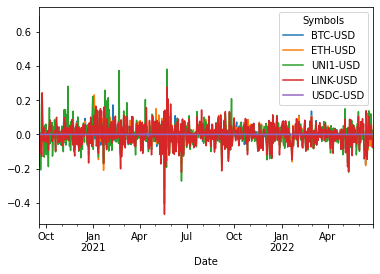

In [7]:
log_returns = df.pct_change().apply(lambda x: np.log(1+x))
log_returns.plot()
plt.show()

In [8]:
cov_matrix = df.pct_change().apply(lambda x: np.log(1+x)).cov()
cov_matrix

Symbols,BTC-USD,ETH-USD,UNI1-USD,LINK-USD,USDC-USD
Symbols,,,,,
BTC-USD,0.001539,0.001613,0.001657,0.001843,-1.510195e-06
ETH-USD,0.001613,0.002626,0.002599,0.002798,-2.626591e-06
UNI1-USD,0.001657,0.002599,0.006083,0.003258,-2.447664e-06
LINK-USD,0.001843,0.002798,0.003258,0.004595,-2.120876e-06
USDC-USD,-0.000002,-0.000003,-0.000002,-0.000002,5.822309e-07


In [9]:
corr_matrix = df.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

Symbols,BTC-USD,ETH-USD,UNI1-USD,LINK-USD,USDC-USD
Symbols,,,,,
BTC-USD,1.000000,0.802213,0.541522,0.692978,-0.050456
ETH-USD,0.802213,1.000000,0.650217,0.805461,-0.067173
UNI1-USD,0.541522,0.650217,1.000000,0.616187,-0.041128
LINK-USD,0.692978,0.805461,0.616187,1.000000,-0.041005
USDC-USD,-0.050456,-0.067173,-0.041128,-0.041005,1.000000


In [10]:
# Randomly weighted portfolio's variance
w = {'BTC-USD': 0.18, 'ETH-USD': 0.3, 'UNI1-USD': 0.01, 'LINK-USD': 0.02, 'USDC-USD':0.49}
port_var = cov_matrix.mul(w, axis=0).mul(w, axis=1).sum().sum()
port_var

0.0005315374661832887

In [11]:
# Yearly returns for individual companies
ind_er = df.resample('Y').last().pct_change().mean()
ind_er

Symbols
BTC-USD     0.017322
ETH-USD     1.651076
UNI1-USD    0.795113
LINK-USD    0.030531
USDC-USD    0.000166
dtype: float64

In [12]:
# Portfolio returns
w = [0.18, 0.3, 0.01, 0.02, 0.49]
port_er = (w*ind_er).sum()
port_er

0.5070841177229686

In [13]:
# Volatility is given by standard deviation.
ann_sd = df.pct_change().apply(lambda x: np.log(1+x)).std()
ann_sd

Symbols
BTC-USD     0.039226
ETH-USD     0.051245
UNI1-USD    0.077995
LINK-USD    0.067785
USDC-USD    0.000763
dtype: float64

In [14]:
assets = pd.concat([ind_er, ann_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
Symbols,,
BTC-USD,0.017322,0.039226
ETH-USD,1.651076,0.051245
UNI1-USD,0.795113,0.077995
LINK-USD,0.030531,0.067785
USDC-USD,0.000166,0.000763


In [15]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df.columns)
num_portfolios = 10000

In [16]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) # Returns are the product of individual expected returns of asset and its 
                                      # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [17]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [18]:
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the 10000 portfolios created

,Returns,Volatility,BTC-USD weight,ETH-USD weight,UNI1-USD weight,LINK-USD weight,USDC-USD weight
0,0.403334,0.051728,0.037832,0.100115,0.281830,0.434676,0.145547
1,0.478359,0.047144,0.160872,0.166580,0.240709,0.298842,0.132998
2,0.496122,0.039372,0.071966,0.169735,0.262640,0.188340,0.307318
3,0.436107,0.045005,0.152912,0.140932,0.241471,0.286366,0.178318
4,0.503668,0.043387,0.040898,0.217693,0.167574,0.335794,0.238041


<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

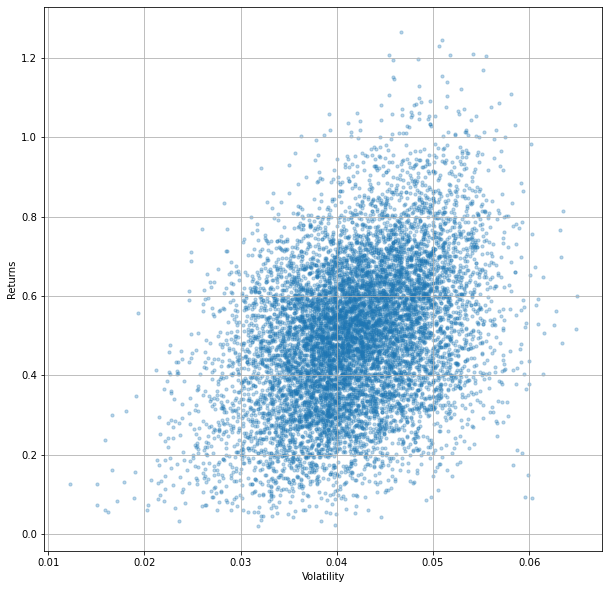

In [19]:
# Plot efficient frontier
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])

In [20]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns            0.126261
Volatility         0.012228
BTC-USD weight     0.147468
ETH-USD weight     0.065058
UNI1-USD weight    0.018571
LINK-USD weight    0.045998
USDC-USD weight    0.722905
Name: 826, dtype: float64

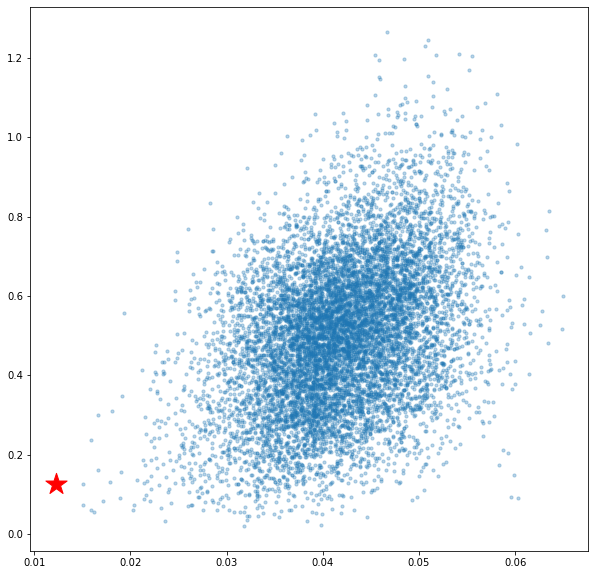

In [21]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

In [22]:
# Finding the optimal portfolio
rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns            0.768231
Volatility         0.025958
BTC-USD weight     0.014768
ETH-USD weight     0.452270
UNI1-USD weight    0.025943
LINK-USD weight    0.017491
USDC-USD weight    0.489527
Name: 600, dtype: float64

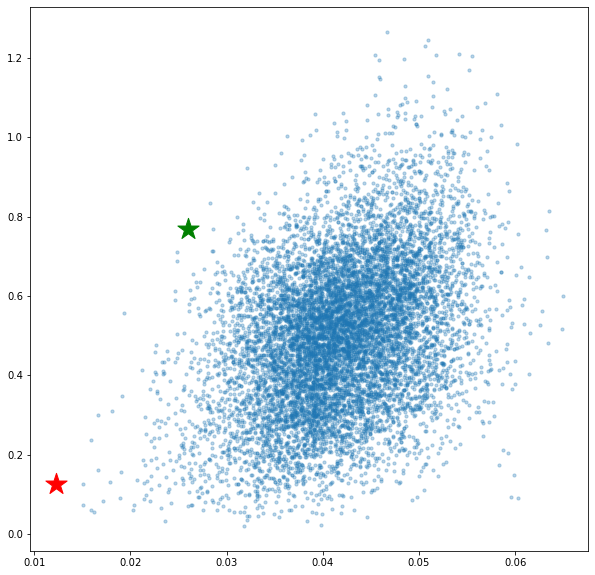

In [23]:
# Plotting optimal portfolio
plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)